<a href="https://colab.research.google.com/github/ccapelo8/learning-pytorch/blob/main/Pytorch_by_freeCodeCamp_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 2

This chapter lectures about classifcation neural networks

#**60-XX. Classification NN

In [260]:
import sklearn

In [261]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [262]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [263]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


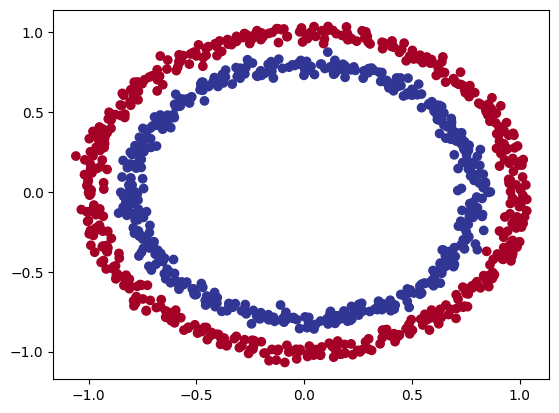

In [264]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

We need to turn the data into tensors

In [265]:
import torch

type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [266]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X),type(y)

(torch.Tensor, torch.Tensor)

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)


In [268]:
len(X_train), len(X_test)

(800, 200)

In [269]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [270]:
from sklearn import datasets

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features =2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, X):
    return self.layer_2(self.layer_1(x))

model_01 = CircleModelV0().to(device)
model_01




CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

There is a way easier way to build "simple" models with nn.Sequential

In [271]:
model_01 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_01

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [272]:
untrained_preds = model_01(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}), Shape: {untrained_preds.shape} ")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n Frist 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200), Shape: torch.Size([200, 1]) 
Length of test samples: 200, Shape: torch.Size([200, 2])

 Frist 10 predictions: 
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [273]:
loss_fn01 = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_01.parameters(),
                            lr=0.1)

In [274]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [275]:
model_01.eval()
with torch.inference_mode():
  y_logits = model_01(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [276]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [277]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_01(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [278]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [279]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_01.train()

  y_logits = model_01(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn01(y_logits,
                   y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing
  model_01.eval()
  with torch.inference_mode():
    test_logits = model_01(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

  test_loss = loss_fn01(test_logits,
                        y_test)
  test_acc = accuracy_fn(y_true = y_test,
                         y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69796, Accuracy: 51.88% | Test loss: 0.69440, Test acc: 58.00
Epoch: 100 | Loss: 0.69331, Accuracy: 49.25% | Test loss: 0.69271, Test acc: 53.00
Epoch: 200 | Loss: 0.69310, Accuracy: 50.88% | Test loss: 0.69336, Test acc: 49.00
Epoch: 300 | Loss: 0.69304, Accuracy: 51.12% | Test loss: 0.69376, Test acc: 46.50
Epoch: 400 | Loss: 0.69301, Accuracy: 51.25% | Test loss: 0.69403, Test acc: 47.50
Epoch: 500 | Loss: 0.69299, Accuracy: 50.88% | Test loss: 0.69423, Test acc: 47.00
Epoch: 600 | Loss: 0.69299, Accuracy: 51.25% | Test loss: 0.69436, Test acc: 46.50
Epoch: 700 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69446, Test acc: 46.00
Epoch: 800 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69453, Test acc: 45.50
Epoch: 900 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69458, Test acc: 45.00


In [280]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


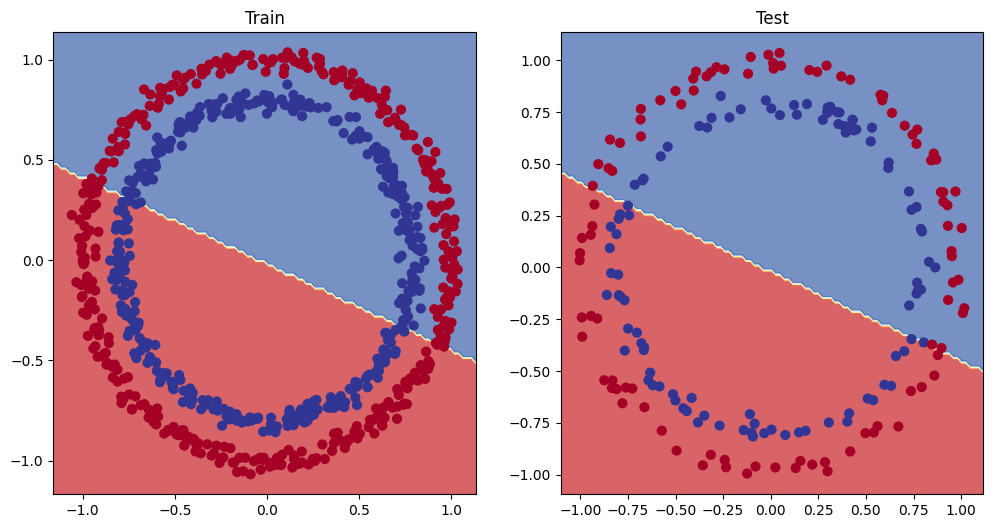

In [281]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_01, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_01, X_test, y_test)

**Let's try to add more hidden layers and neurons per layer to see if that's the issue**

In [282]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x): # note: always make sure forward is spelt correctly!
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [283]:
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [284]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss:{test_loss}")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss:0.6926146745681763
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss:0.6937904357910156
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss:0.6943727135658264
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss:0.6945767998695374
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss:0.6946452260017395
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss:0.6946680545806885
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss:0.6946756839752197
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss:0.6946782469749451
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss:0.6946790814399719
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss:0.6946793794631958


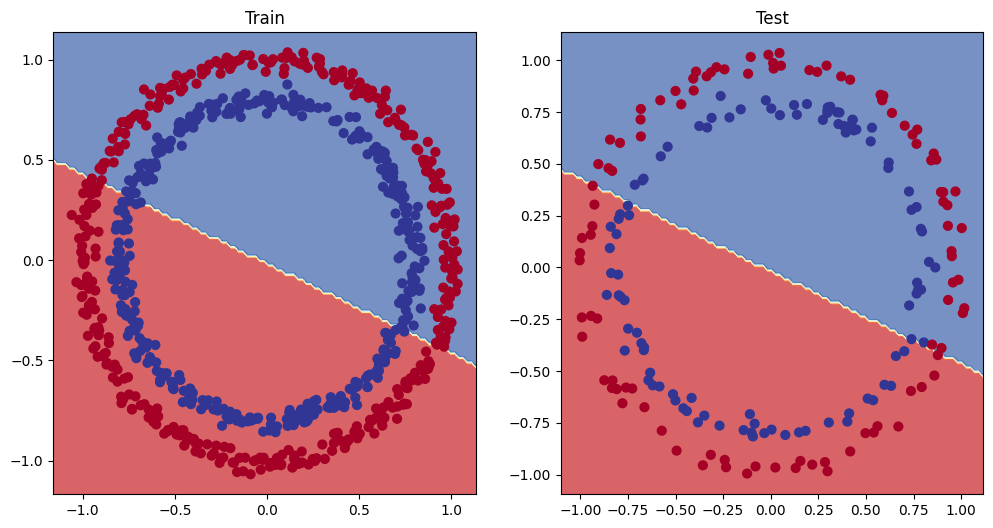

In [285]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

**We can clearly see that wasn't the problem, the model is linear, we need to add a non-linerity, to do so we'll use ReLU**

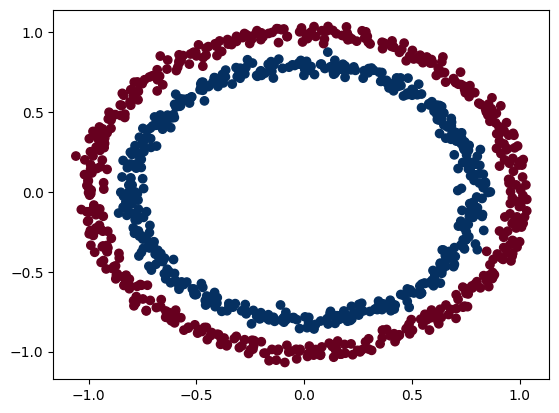

In [286]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [287]:
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [288]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features =2, out_features = 10)
    self.layer_2 = nn.Linear(in_features =10, out_features = 10)
    self.layer_3 = nn.Linear(in_features =10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.layer_1(x))))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [289]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                             lr = 0.1)

In [290]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
      test_logits = model_2(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.69833, Accuracy: 50.00% | Test Loss: 0.6986272931098938
Epoch: 100 | Loss: 0.69289, Accuracy: 50.88% | Test Loss: 0.6941098570823669
Epoch: 200 | Loss: 0.69015, Accuracy: 53.37% | Test Loss: 0.6914085745811462
Epoch: 300 | Loss: 0.68762, Accuracy: 56.62% | Test Loss: 0.6882835030555725
Epoch: 400 | Loss: 0.68469, Accuracy: 60.00% | Test Loss: 0.6846882700920105
Epoch: 500 | Loss: 0.67985, Accuracy: 56.00% | Test Loss: 0.6789020895957947
Epoch: 600 | Loss: 0.67280, Accuracy: 56.00% | Test Loss: 0.6717610955238342
Epoch: 700 | Loss: 0.66304, Accuracy: 64.50% | Test Loss: 0.6645210385322571
Epoch: 800 | Loss: 0.64710, Accuracy: 74.12% | Test Loss: 0.6530028581619263
Epoch: 900 | Loss: 0.62182, Accuracy: 81.62% | Test Loss: 0.632409393787384


In [291]:
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

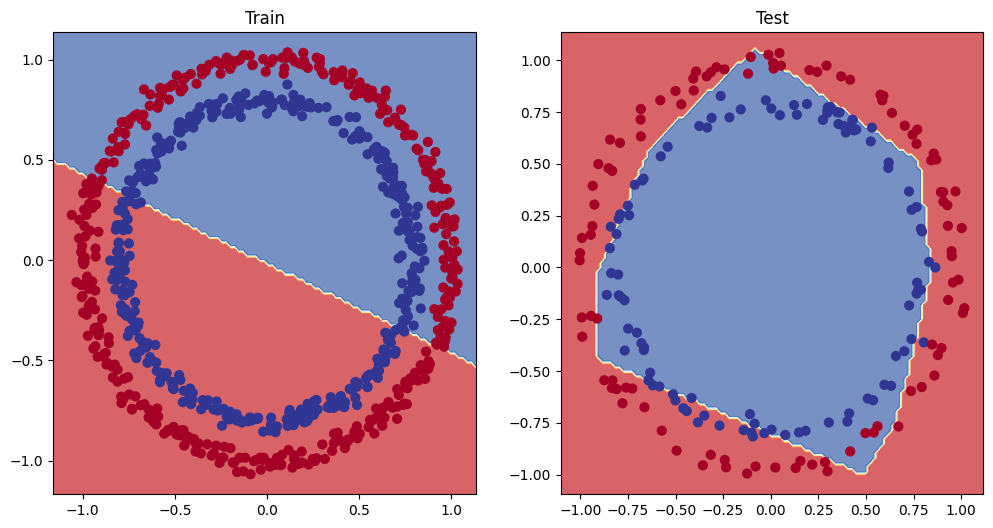

In [292]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_3 = has non-linearity